In [104]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

0.035859148855013755


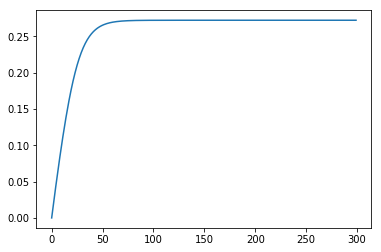

In [105]:
b1 = 0.1;
b2 = 0.9;
Nspin = 300;   # numero degli x_i con cui approssimare l'asse reale
Ntime = 300;   # numero di iterazioni "temporali" della mappa di punto fisso
Niter = 100;   # numero di ripetizioni dell'esperimento per filtrare rumore gaussiano

Mfinale = np.zeros(Niter);
for k in range(0,Niter):
    
    x = np.random.normal(0,1,Nspin) 
    m = np.zeros(Nspin)
    M = np.zeros(Ntime) 
    
    for j in range(0,Ntime):
        
        M[j] = np.mean(m)   # l'approssimazione della media 2
        
        for i in range(0,Nspin):
            def f(y,a,b):
                return (y - math.tanh(b1*(y + a) + b2*b))  # l'eq. dei punti fissi

            m[i] = fsolve(f, 0.1, args = (x[i], M[j]))  # l'approssimazione delle m1
    
    Mfinale[k] = M[Ntime-1]  # la media finale sulle varie ripetiz. dell'esperimento
    
print(np.mean(Mfinale))
plt.plot(M)